# _USD to Australian Dollar- Time Series Analysis_
**_Importing The Required Libraries & Packages_**

In [1]:
!pip install pmdarima

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 25.3 MB/s eta 0:00:00


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import seaborn as sns
%matplotlib inline
import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima.model import ARIMA
from pmdarima import auto_arima
from statsmodels.graphics.tsaplots import plot_acf , plot_pacf
from pandas.plotting import autocorrelation_plot
from statsmodels.tsa.stattools import adfuller
from math import sqrt
from sklearn.metrics import r2_score , mean_absolute_error , mean_absolute_percentage_error , mean_squared_error
import pickle
import warnings
warnings.filterwarnings('ignore')

**_Changing The Default Working Directory & Path and Reading The Dataset Using Pandas Command and displaying the first five record_**

In [3]:
df = pd.read_csv('/content/exchange_rate.csv')
df.head()

,date,Ex_rate
0,01-01-1990 00:00,0.7855
1,02-01-1990 00:00,0.7818
2,03-01-1990 00:00,0.7867
3,04-01-1990 00:00,0.7860
4,05-01-1990 00:00,0.7849


## _Exploratory Data Analysis (EDA)_
**_Getting the shape of the dataset_**

In [4]:
df.shape

(7588, 2)

**_Checking for the null values in the column from the dataset_**

In [5]:
df.isnull().sum()

date       0
Ex_rate    0
dtype: int64

**_Checking for the duplicate value in the dataset_**

In [6]:
df.duplicated().sum()

0

**_Checking the data type of the column in the dataset_**

In [7]:
df.dtypes

date        object
Ex_rate    float64
dtype: object

**_Getting the summary of various descriptive statistics for the numeric column in the dataset_**

In [8]:
df.describe()

,Ex_rate
count,7588.000000
mean,0.776974
std,0.136620
min,0.483297
25%,0.701422
50%,0.761377
75%,0.873477
max,1.102536


## _Data Preprocessing_
**_Changing the data type of `Date` column as <span Style= 'color:red'> Date </span> using pandas command_**

In [9]:
df['date'] = pd.to_datetime(df['date'], format='%d-%m-%Y %H:%M')

**_Changing the `Date` columns as the index column of the dataset and also displaying the first five records of the dataset_**

In [10]:
df.set_index('date',inplace = True)

## _Data Processing & Visualization_
**1) Plotting the line graph to show the data trend in the dataset**

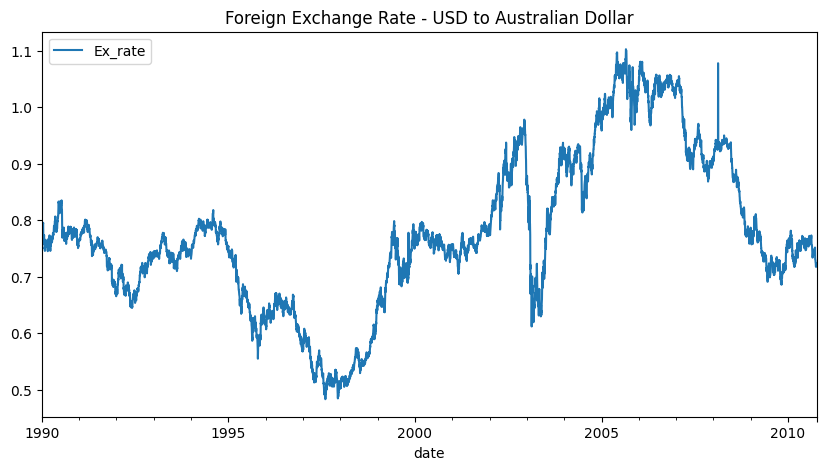

In [11]:
df.plot(figsize = (10,5))
plt.title('Foreign Exchange Rate - USD to Australian Dollar')
plt.show()

**_2) Resampling the dataset to weekly frequency since the given data has more number of observations that takes longer time to fit or predict the model. And along with that showing number of observation after resampling and displaying the first five record of resampled dataset_**

In [12]:
df_week = df.resample('W').mean()
print('Count of The Weekly Data Frame : ',df_week.shape[0])
df_week.head()

Count of The Weekly Data Frame :  1084


,Ex_rate
date,
1990-01-07,0.785729
1990-01-14,0.792714
1990-01-21,0.764871
1990-01-28,0.762429
1990-02-04,0.753529


**Plotting the line graph to show the data trend in the weekly resampled dataset**

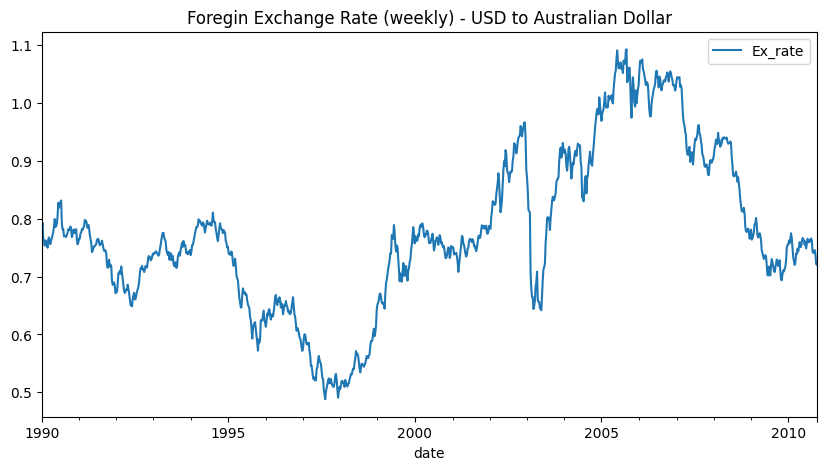

In [13]:
df_week.plot(figsize = (10,5))
plt.title('Foregin Exchange Rate (weekly) - USD to Australian Dollar')
plt.show()

**_3) Resampling the dataset to monthly frequency since the given data has more number of observations that takes longer time to fit or predict the model. And along with that showing number of observation after resampling and displaying the first five record of resampled dataset_**

In [14]:
df_month = df.resample('M').mean()
print('Count of The Monthly Data Frame : ',df_month.shape[0])
df_month.head()

Count of The Monthly Data Frame :  250


,Ex_rate
date,
1990-01-31,0.773874
1990-02-28,0.757486
1990-03-31,0.760365
1990-04-30,0.770110
1990-05-31,0.789684


**Plotting the line graph to show the data trend in the monthly resampled dataset**

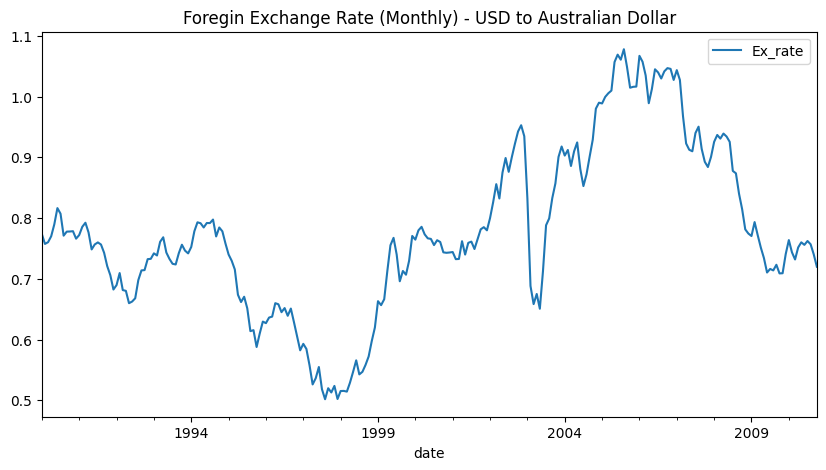

In [15]:
df_month.plot(figsize = (10,5))
plt.title('Foregin Exchange Rate (Monthly) - USD to Australian Dollar')
plt.show()

**_4) Resampling the dataset to yearly frequency since the given data has more number of observations that takes longer time to fit or predict the model. And along with that showing number of observation after resampling and displaying the first five record of resampled dataset_**

In [16]:
df_year = df.resample('Y').mean()
print('Count of The Yearly Data Frame : ',df_year.shape[0])
df_year.head()

Count of The Yearly Data Frame :  21


,Ex_rate
date,
1990-12-31,0.778996
1991-12-31,0.749830
1992-12-31,0.695201
1993-12-31,0.743442
1994-12-31,0.781024


**Plotting the line graph to show the data trend in the yearly resampled dataset**

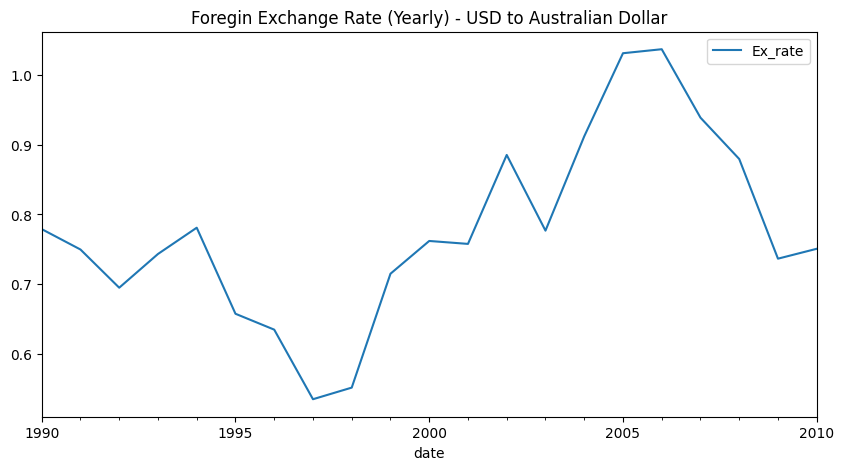

In [17]:
df_year.plot(figsize = (10,5))
plt.title('Foregin Exchange Rate (Yearly) - USD to Australian Dollar')
plt.show()

**_Plotting the scatter plot to show the data trend in the weekly resampled dataset. And by observing all the above resampled graph , weekly resampled data has more clear peak and perks among all resample data_**

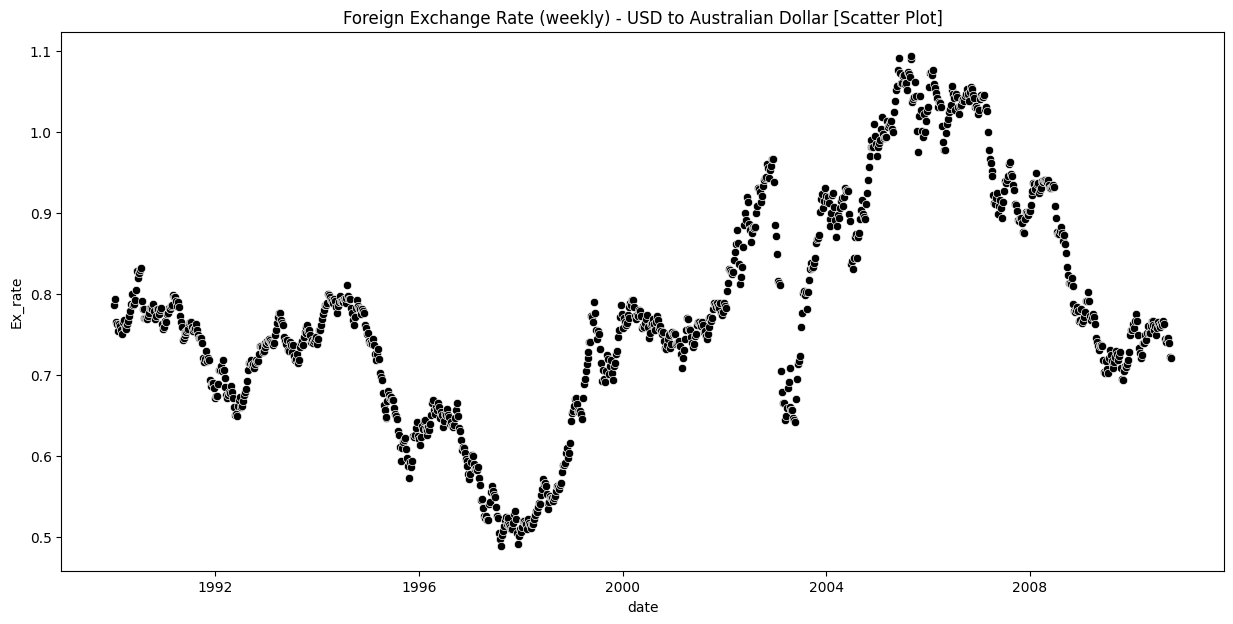

In [18]:
plt.rcParams['figure.figsize'] = (15,7)
sns.scatterplot(x = df_week.index , y = df_week.Ex_rate , color = 'black')
plt.title('Foreign Exchange Rate (weekly) - USD to Australian Dollar [Scatter Plot]')
plt.show()

**_Plotting the dist plot using seaborn to show the data spread in the resampled weekly dataset_**

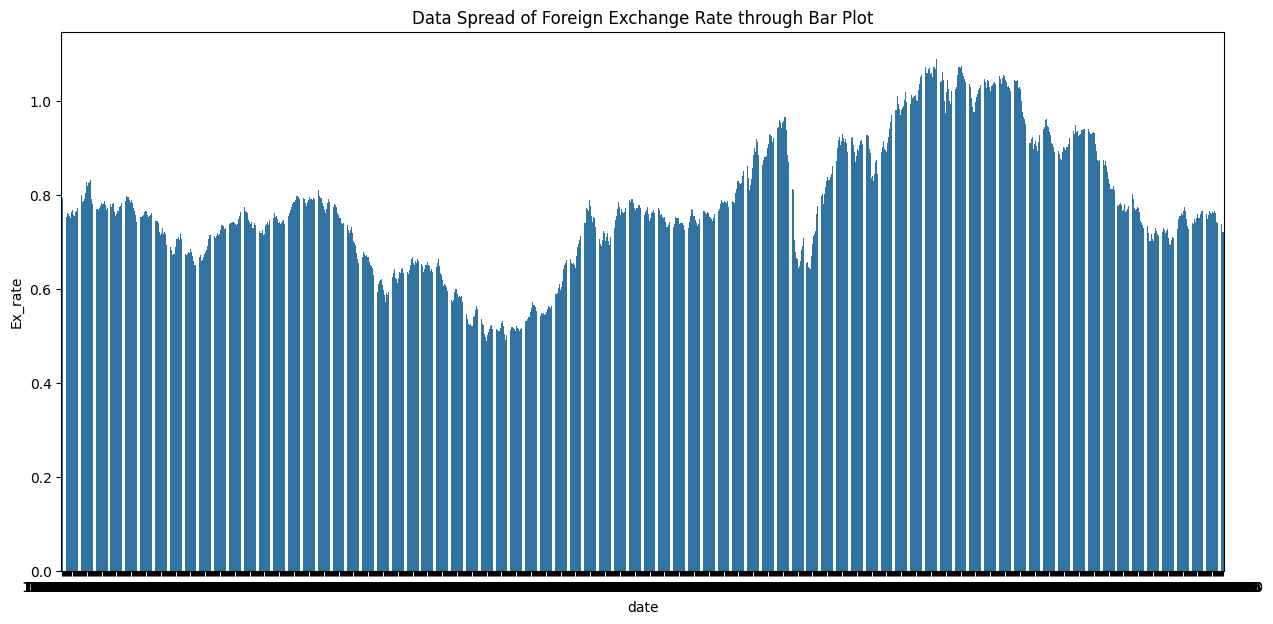

In [19]:
sns.barplot(data = df_week,x = df_week.index , y = df_week.Ex_rate)
plt.title('Data Spread of Foreign Exchange Rate through Bar Plot')
plt.show()

**_Plotting the dist plot using seaborn to show the data distribution in the resampled weekly dataset_**

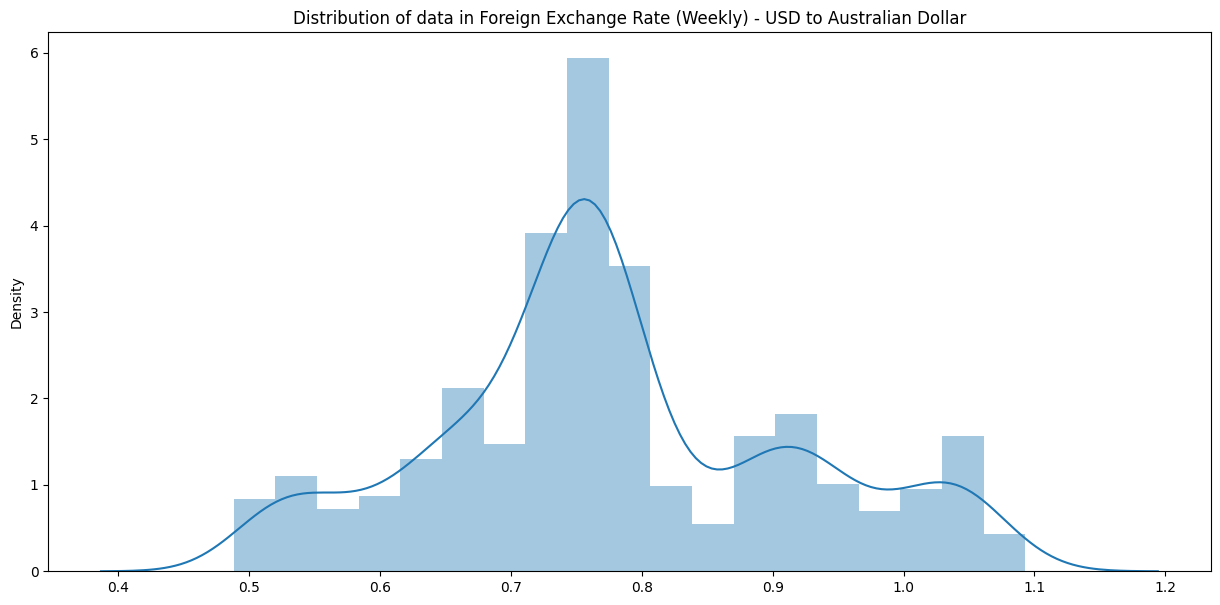

In [20]:
sns.distplot(df_week)
plt.title('Distribution of data in Foreign Exchange Rate (Weekly) - USD to Australian Dollar')
plt.show()

**_Plotting the histogram and KDE line graph to show the distribution of data in the dataset_**

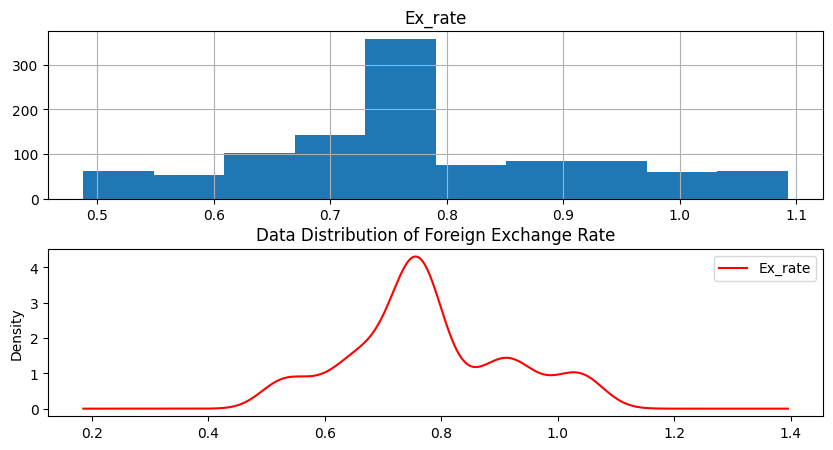

In [21]:
fig , (ax1,ax2) = plt.subplots(nrows = 2 ,ncols = 1,sharex = False , sharey = False , figsize = (10,5))
df_week.hist(ax = ax1)
df_week.plot(kind = 'kde' , ax = ax2,c = 'r')
plt.title('Data Distribution of Foreign Exchange Rate')
plt.show()

**_Plotting the graph with Seasonal Decomposition function to show the data discription ,trend , seasonal , residuals_**

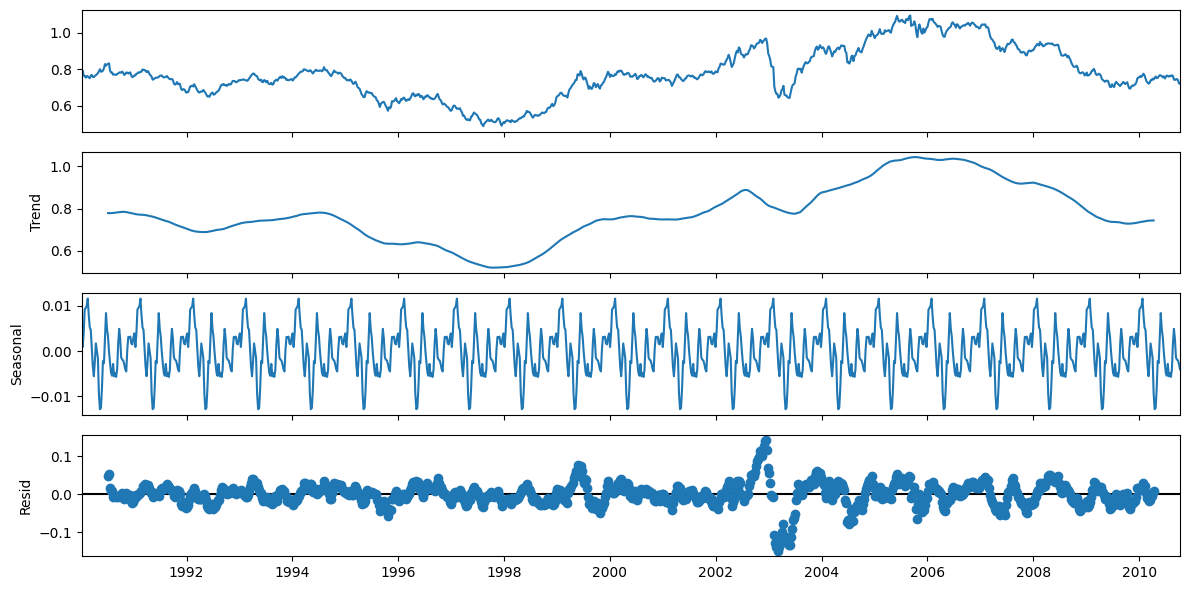

In [22]:
plt.rcParams['figure.figsize']=(12,6)
decomposition = seasonal_decompose(df_week , period = 52 , model = 'additive')
decomposition.plot()
plt.show()

**_Plotting the graph with Partial Autocorrelation and Auto Correleation of the data from the dataset_**

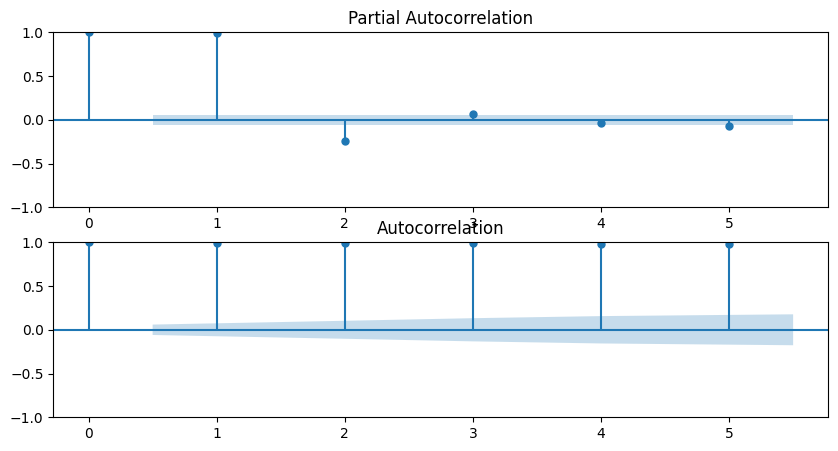

In [23]:
fig , (ax1,ax2) = plt.subplots(nrows = 2 ,ncols = 1,sharex = False , sharey = False , figsize = (10,5))
ax1 = plot_pacf(df_week , lags = 5 , ax = ax1)
ax2 = plot_acf(df_week , lags = 5 , ax = ax2)
plt.show()

## _Data Transformation_

**_The adf_check() function performs an Augmented Dickey-Fuller test on a time series. The test is used to determine whether a time series is stationary or not. If the p-value of the test is less than or equal to 0.05, then there is strong evidence against the null hypothesis, and the series is considered to be stationary. Otherwise, the series is considered to be non-stationary. The function takes a time series as input and returns the results of the test. The results are printed to the console, along with a message indicating whether the series is stationary or not._**

In [24]:
def adf_check(time_series):
    result = adfuller(time_series , autolag = 'AIC')
    label = pd.Series(result[0:4], index=['Test Statistic','p-value','Number of Lags Used','Number of Observations Used'])
    for key,value in result[4].items():
        label['Critical Value (%s)'%key] = value
    print(label)
    if result[1] <= 0.05:
        print('Strong evidence against the null hypothesis, hence REJECT null hypothesis and the series is Stationary')
    else:
        print ('Weak evidence against the null hypothesis, hence ACCEPT null hypothesis and the series is Not Stationary ')

**_Performing the Augmented Dickey Fuller Test on the original data in the  resampled weekly dataset to find whether the time series is a stationary or not_**

In [25]:
adf_check(df_week)

Test Statistic                   -1.800054
p-value                           0.380435
Number of Lags Used               4.000000
Number of Observations Used    1079.000000
Critical Value (1%)              -3.436425
Critical Value (5%)              -2.864222
Critical Value (10%)             -2.568198
dtype: float64
Weak evidence against the null hypothesis, hence ACCEPT null hypothesis and the series is Not Stationary 


**_Since the time series is not a stationary , the resampled weekly dataset is transformed as a new dataframe with first difference to make it as a stationary series. Along with that showing number of observation in the new dataframe and displaying the first five record of the new data frame_**

In [26]:
df1_week = df_week.diff().dropna()
print('Count of weekly First Difference',df1_week.shape[0])
df1_week.head()

Count of weekly First Difference 1083


,Ex_rate
date,
1990-01-14,0.006986
1990-01-21,-0.027843
1990-01-28,-0.002443
1990-02-04,-0.008900
1990-02-11,0.009114


**_Performing the Augmented Dickey Fuller Test on the new transformed data in the resampled weekly dataset to find whether the time series is a stationary or not_**

In [27]:
adf_check(df1_week)

Test Statistic                -1.434209e+01
p-value                        1.055846e-26
Number of Lags Used            3.000000e+00
Number of Observations Used    1.079000e+03
Critical Value (1%)           -3.436425e+00
Critical Value (5%)           -2.864222e+00
Critical Value (10%)          -2.568198e+00
dtype: float64
Strong evidence against the null hypothesis, hence REJECT null hypothesis and the series is Stationary


**_Plotting the line graph to show the data trend in the transformed data from the resampled weekly dataset_**

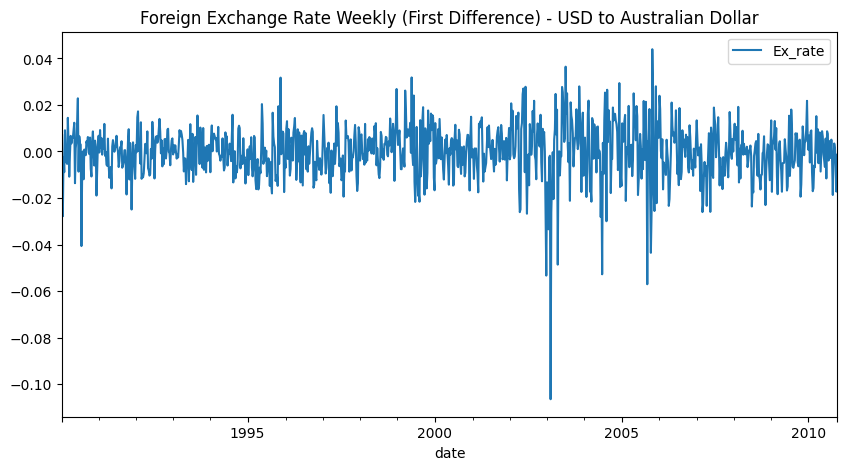

In [28]:
df1_week.plot(figsize = (10,5))
plt.title('Foreign Exchange Rate Weekly (First Difference) - USD to Australian Dollar')
plt.show()

**_Plotting the graph with pandas auto correlation plot to show the difference between the stationary data and non - stationary data_**

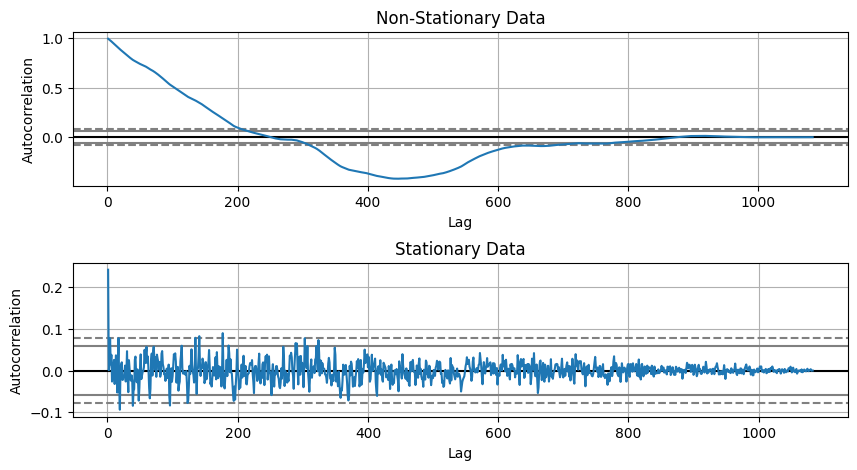

In [29]:
fig , (ax1,ax2) = plt.subplots(nrows = 2 ,ncols = 1,sharex = False , sharey = False , figsize = (10,5))
ax1 = autocorrelation_plot(df_week , ax = ax1)
ax1.set_title('Non-Stationary Data')

ax2 = autocorrelation_plot(df1_week , ax = ax2)
ax2.set_title('Stationary Data')
plt.subplots_adjust(hspace = 0.5)
plt.show()

## _Model Fitting_
**_Getting the p value and q value for the model fitting using `auto_arima` function by passing through some needed parameters , the best model is evaluated by least Akaike Information Criterion (AIC)_**

In [30]:
# Fit an ARIMA model to the weekly time series data
model = auto_arima(
    df_week,        # The input time series data
    m=52,           # Seasonal period (set to 52 for weekly data, but seasonal=False)
    d=1,            # Degree of differencing (non-seasonal)
    seasonal=False, # Fit a non-seasonal ARIMA model
    max_order=8,    # Maximum number of p+q+d terms to consider
    test='adf',     # Test to use for checking stationarity (Augmented Dickey-Fuller)
    trace=True      # Enable verbose output
)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-6685.063, Time=2.74 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-6624.331, Time=0.65 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-6687.232, Time=0.47 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-6691.370, Time=2.47 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-6626.300, Time=0.58 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-6689.294, Time=2.18 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=-6689.240, Time=1.55 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=-6687.279, Time=1.60 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=-6693.352, Time=0.75 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=-6691.277, Time=0.59 sec
 ARIMA(0,1,2)(0,0,0)[0]             : AIC=-6691.222, Time=0.86 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=-6689.215, Time=0.24 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=-6689.262, Time=0.33 sec

Best model:  ARIMA(0,1,1)(0,0,0)[0]          
Total fit time: 15.081 seconds


**_Defining the summary of the model fitted with auto_arima function , here getting various information such as Akaike Information Criterion (AIC), Bayesian Information Criterion (BIC) , Hannan-Quinn Information Criterion (HQIC), Log Likelihood etc. From which we can evaluate the model_**

In [31]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 1084
Model:               SARIMAX(0, 1, 1)   Log Likelihood                3348.676
Date:                Mon, 15 Jul 2024   AIC                          -6693.352
Time:                        18:33:23   BIC                          -6683.377
Sample:                    01-07-1990   HQIC                         -6689.575
                         - 10-10-2010                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1          0.2606      0.026      9.968      0.000       0.209       0.312
sigma2         0.0001   2.14e-06     56.284      0.000       0.000       0.000
===================================================================================
Ljung-Box (L1) (Q):                   0.02   Jarque-Bera (JB):              4493.99
Prob(Q):                              0.89   Prob(JB):                         0.00
Heteroskedasticity (H):               2.16   Skew:                            -1.12
Prob(H) (two-sided):                  0.00   Kurtosis:                        12.73
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

**_Fitting the model in ARIMA Model with the Best value got from the `auto_arima` in the training data and getting the summary of the fitted model._**

In [32]:
model = ARIMA(df_week , order = (0,1,1))
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                Ex_rate   No. Observations:                 1084
Model:                 ARIMA(0, 1, 1)   Log Likelihood                3348.676
Date:                Mon, 15 Jul 2024   AIC                          -6693.352
Time:                        18:33:23   BIC                          -6683.377
Sample:                    01-07-1990   HQIC                         -6689.575
                         - 10-10-2010                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1          0.2606      0.026      9.968      0.000       0.209       0.312
sigma2         0.0001   2.14e-06     56.284      0.000       0.000       0.000
===================================================================================
Ljung-Box (L1) (Q):                   0.02   Jarque-Bera (JB):              4493.99
Prob(Q):                              0.89   Prob(JB):                         0.00
Heteroskedasticity (H):               2.16   Skew:                            -1.12
Prob(H) (two-sided):                  0.00   Kurtosis:                        12.73
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

**Plotting the diagnostic plot for the fitted model to show the best fit of the model**

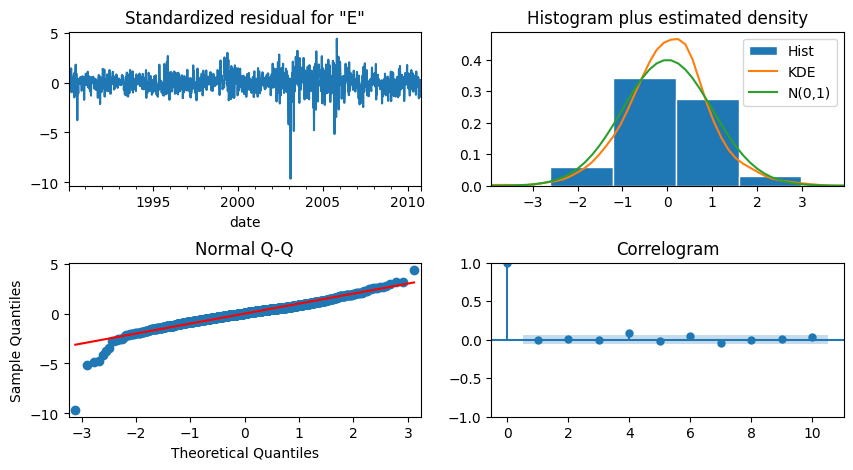

In [33]:
result.plot_diagnostics(figsize = (10,5))
plt.subplots_adjust(hspace = 0.5)
plt.show()

**_Predicting the value using fitted model with whole resampled weekly data_**

In [34]:
predictions = result.predict(typ = 'levels')

## _Model Evaluation_
**_Evaluating the model with the following metrics such as percentage of r2 score , mean squared error , root mean squared error , mean absolute error and mean absolute percentage error for the predicted value and whole data value._**

In [35]:
print('Evaluation Result for whole data : ','\n')
print('R2 Score for whole data : {0:.2f} %'.format(100*r2_score(df_week['Ex_rate'],predictions)),'\n')
print('Mean Squared Error : ',mean_squared_error(df_week['Ex_rate'],predictions),'\n')
print('Mean Absolute Error : ',mean_absolute_error(df_week['Ex_rate'],predictions),'\n')
print('Root Mean Squared Error : ',sqrt(mean_squared_error(df_week['Ex_rate'],predictions)),'\n')
print('Mean Absolute Percentage Error : {0:.2f} %'.format(100*mean_absolute_percentage_error(df_week['Ex_rate'],predictions)))

Evaluation Result for whole data :  

R2 Score for whole data : 96.29 % 

Mean Squared Error :  0.0006901464428926067 

Mean Absolute Error :  0.00865441827513414 

Root Mean Squared Error :  0.026270638418062982 

Mean Absolute Percentage Error : 1.12 %


## _Result_
**_Concating the Resampled weekly dataset and weekly first difference dataframe and the prediction value and naming the columns as `Foreign Exchange Rate (weekly)','Weekly First Difference','Predicted Exchange Rate` and exporting the dataframe to [Comma Seperated Value (CSV)] file. Also displaying the first five records of the exported dataframe._**

In [36]:
Final_data = pd.concat([df_week,df1_week,predictions],axis=1)
Final_data.columns = ['Foreign Exchange Rate (weekly)','Weekly First Difference','Predicted Exchange Rate']
Final_data.to_csv('Foreign Exchange Rate with Prediction (USD to Australian Dollar).csv')
Final_data.head()

,Foreign Exchange Rate (weekly),Weekly First Difference,Predicted Exchange Rate
date,,,
1990-01-07,0.785729,NaN,0.000000
1990-01-14,0.792714,0.006986,0.785729
1990-01-21,0.764871,-0.027843,0.794419
1990-01-28,0.762429,-0.002443,0.757203
1990-02-04,0.753529,-0.008900,0.763790


## _Model Testing_
**_Splliting the Resampled Weekly Dataset into training data and test data. Displaying the number of observations in both training data and test data._**

In [37]:
size = int(len(df_week)*0.80)
train , test = df_week[0:size]['Ex_rate'] , df_week[size:(len(df_week))]['Ex_rate']
print('Counts of Train Data : ',train.shape[0])
print('Counts of Train Data : ',test.shape[0])

Counts of Train Data :  867
Counts of Train Data :  217


**_Creating the list of train dataset values in train_values and empty predictions list which will be appended after the prediction. Then fitting the model with ARIMA model with the best value got from auto_arima model in the train_values data and predicting with test data value and appending it to the predictions list and printing the comparison between predicted value and actual value_**

In [38]:
train_values = [x for x in train]
prediction = []
print('Printing Predictied vs Expected Values....')
print('\n')
for t in range(len(test)):
    model = ARIMA(train_values , order = (0,1,1))
    model_fit = model.fit()
    output = model_fit.forecast()
    pred_out = output[0]
    prediction.append(float(pred_out))
    test_in = test[t]
    train_values.append(test_in)
    print('Predicted = %f , Actual = %f' % (pred_out , test_in))

Printing Predictied vs Expected Values....


Predicted = 1.020466 , Actual = 1.031167
Predicted = 1.033863 , Actual = 1.033182
Predicted = 1.033011 , Actual = 1.038432
Predicted = 1.039798 , Actual = 1.039574
Predicted = 1.039517 , Actual = 1.037241
Predicted = 1.036668 , Actual = 1.044465
Predicted = 1.046428 , Actual = 1.046676
Predicted = 1.046738 , Actual = 1.052859
Predicted = 1.054400 , Actual = 1.046291
Predicted = 1.044253 , Actual = 1.037256
Predicted = 1.035495 , Actual = 1.048507
Predicted = 1.051772 , Actual = 1.054639
Predicted = 1.055358 , Actual = 1.052527
Predicted = 1.051816 , Actual = 1.044990
Predicted = 1.043273 , Actual = 1.041232
Predicted = 1.040719 , Actual = 1.030797
Predicted = 1.028299 , Actual = 1.032021
Predicted = 1.032956 , Actual = 1.028472
Predicted = 1.027345 , Actual = 1.021559
Predicted = 1.020104 , Actual = 1.026367
Predicted = 1.027940 , Actual = 1.039732
Predicted = 1.042701 , Actual = 1.044737
Predicted = 1.045250 , Actual = 1.043060
Predicted = 

**_Evaluating the model with the following metrics such as percentage of r2 score , mean squared error , root mean squared error , mean absolute error and mean absolute percentage error for the predicted value and test data._**

In [39]:
print('Evaluation Result for Test data : ','\n')
print('R2 Score for Test data : {0:.2f} %'.format(100*r2_score(test,prediction)),'\n')
print('Mean Squared Error : ',mean_squared_error(test,prediction),'\n')
print('Mean Absolute Error : ',mean_absolute_error(test,prediction),'\n')
print('Root Mean Squared Error : ',sqrt(mean_squared_error(test,prediction)),'\n')
print('Mean Absolute Percentage Error : {0:.2f} %'.format(100*mean_absolute_percentage_error(test,prediction)))

Evaluation Result for Test data :  

R2 Score for Test data : 99.34 % 

Mean Squared Error :  7.930221814093573e-05 

Mean Absolute Error :  0.006992659438978596 

Root Mean Squared Error :  0.008905179287411103 

Mean Absolute Percentage Error : 0.84 %


**_Making the predicted value as series and index as same as Test Data index since the prediction is based on test data_**

In [40]:
predictions_df = pd.Series(prediction, index = test.index)

**_Plotting the graph with predicted data and resampled weekly data index since the prediction is based on test data._**

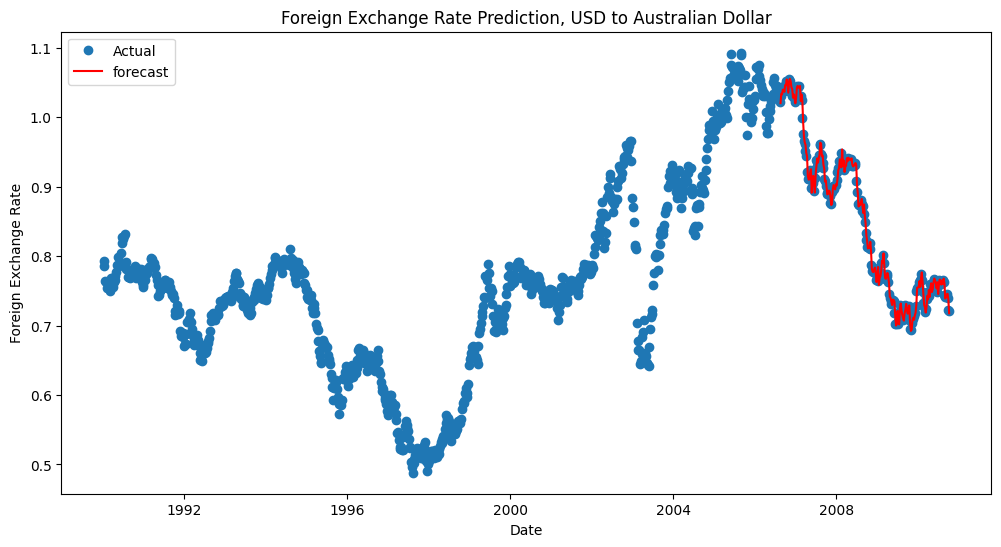

In [41]:
plt.rcParams['figure.figsize'] = (12,6)
fig, ax = plt.subplots()
ax.set(title='Foreign Exchange Rate Prediction, USD to Australian Dollar', xlabel='Date', ylabel='Foreign Exchange Rate')
ax.plot(df_week, 'o', label='Actual')
ax.plot(predictions_df, 'r', label='forecast')
legend = ax.legend(loc='upper left')
legend.get_frame().set_facecolor('w')
plt.show()